<a href="https://colab.research.google.com/github/farahwadya/Resampling-data-time-series/blob/main/(Core)_Preparing_Time_Series_from_Wide_Form_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# upload pckage

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week21/Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv'
df=pd.read_csv(fpath)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [20]:
df.isnull().sum().sum()

np.int64(1754072)

In [21]:
df.duplicated().sum()

np.int64(0)

# Filter the 4 largest cities into a new dataframe.


In [22]:
lrg_city=df[df['SizeRank']<4]
lrg_city.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [23]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [24]:
lrg_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 8.8+ KB


In [25]:
df_long=pd.melt(lrg_city,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name='Date', value_name='Population')

In [26]:
df_long['Date'] = pd.to_datetime(df_long['Date'])
df_long.set_index('Date', inplace=True)

In [27]:
# Resample the dataframe as monthly frequency, grouped by City.
df_monthly=df_long.groupby('RegionName').resample('M').sum()
df_monthly

/tmp/ipython-input-1423192828.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly=df_long.groupby('RegionName').resample('M').sum()


RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2022-05-31      6181         0   New York       city        NY   
           2022-06-30      6181         0   New York       city        NY   
           2022-07-31      6181         0   New York       city        NY   
           2022-08-31      6181         0   New York       city        NY   
           2022-09-30      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2022-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-06-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-07-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-08-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2022-09-30    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName  Population  
RegionName Date                                   
Chicago    2000-01-31    Cook County    166139.0  
           2000-02-29    Cook County    166536.0  
           2000-03-31    Cook County    167368.0  
           2000-04-30    Cook County    168826.0  
           2000-05-31    Cook County    170499.0  
...                              ...         ...  
New York   2022-05-31  Queens County    768797.0  
           2022-06-30  Queens County    773944.0  
           2022-07-31  Queens County    777692.0  
           2022-08-31  Queens County    779960.0  
           2022-09-30  Queens County    781622.0  

[1092 rows x 9 columns]

In [28]:
df_long.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Population
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


# Part 2

In [44]:
def thousands(x,pos):
  new_x=x/1000
  return f'{new_x:,.0f}k'
fmt_thousands=FuncFormatter(thousands)

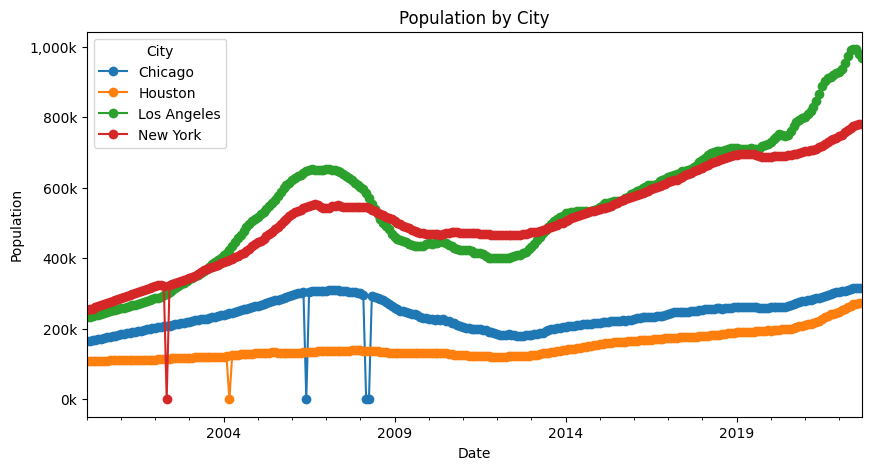

In [45]:
#Plot the home values for all 4 cities.
df_unstacked=df_monthly['Population'].unstack(level=0) # level=1, return it to nearly wide form data
plot= df_unstacked.plot(figsize=(10,5),marker='o')
plot.set_xlabel('Date')
plot.yaxis.set_major_formatter(fmt_thousands)
plot.set_ylabel('Population')
plot.set_title('Population by City')
plt.legend(title='City')
plt.show()


In [48]:
df_diff = df_unstacked.diff()
change_dec = df_diff.loc['2008-12-31']
print(change_dec)


RegionName
Chicago        -5753.0
Houston         -964.0
Los Angeles   -12611.0
New York       -4458.0
Name: 2008-12-31 00:00:00, dtype: float64


1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
`Chicago`
2) How much did the home values change from November 2008 to December 2008 (in dollars)?
- it all decreases
RegionName
Chicago  the price decrease by -5753.0 dollars
Houston the price decrease by -964.0 dollars
Los Angeles the price decrease by  -12611.0 dollars
New York the price decrease by -4458.0 dollars

# additional question to understand the plot

In [59]:

df_unstacked = df_unstacked.sort_index()

# change for each city
change_per_city = df_unstacked.iloc[-1] - df_unstacked.iloc[0]

# city with highest price
max_city = change_per_city.idxmax()
max_change = change_per_city.max()

print(f"The city with the highest price increase is {max_city} with a change of ${max_change:,.0f}")



The city with the highest price increase is Los Angeles with a change of $732,414


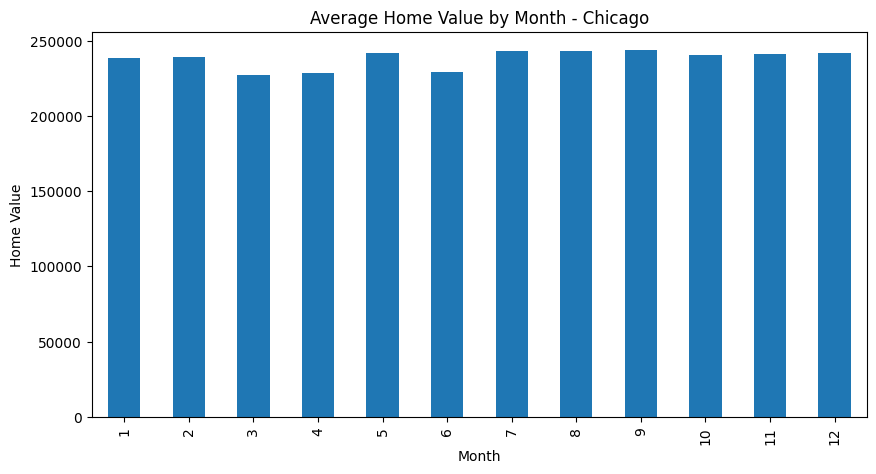

In [57]:

df_unstacked['Month'] = df_unstacked.index.month

# claculate avg
monthly_avg = df_unstacked.groupby('Month')['Chicago'].mean()

# plot monthly avg
monthly_avg.plot(kind='bar', figsize=(10,5))
plt.title('Average Home Value by Month - Chicago')
plt.ylabel('Home Value')
plt.show()
